# Understand the Data

[Data set](https://www.kaggle.com/datasets/muhammadroshaanriaz/global-best-selling-phone-sales )

# Import libraries

In [1]:
# type: ignore
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import squarify

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Rudra\Downloads\Python Project\Python_Pandas_profiling\Mobile_sale_Analysis\top 120 best-selling mobile phones.csv')
df

,Rank,Manufacturer,Model,Form Factor,Smartphone?,Year,Units Sold (million )
0,1,Nokia,1100,Bar,False,2003,250.0
1,2,Nokia,1110,Bar,False,2005,247.5
2,3,Apple,iPhone 6 & 6 Plus,Touchscreen,True,2014,222.4
3,4,Nokia,105 Series,Bar,False,2013,200.0
4,5,Apple,iPhone 6S & 6S Plus,Touchscreen,True,2015,174.1
...,...,...,...,...,...,...,...
115,116,Samsung,Samsung Galaxy A55,Touchscreen,True,2024,2.7
116,117,Samsung,Samsung Galaxy S24,Touchscreen,True,2024,2.4
117,118,Samsung,Samsung Galaxy A15 4G,Touchscreen,True,2023,2.2
118,119,Google,Pixel & Pixel XL,Touchscreen,True,2016,2.1


In [3]:
df.size

840

In [4]:
df.shape

(120, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rank                   120 non-null    int64  
 1   Manufacturer           120 non-null    object 
 2   Model                  120 non-null    object 
 3   Form Factor            120 non-null    object 
 4   Smartphone?            120 non-null    bool   
 5   Year                   120 non-null    int64  
 6   Units Sold (million )  120 non-null    float64
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 5.9+ KB


In [6]:
df.rename(columns={'Units Sold (million )':'Units Sold'}, inplace=True)

In [7]:
df.describe(include='all')

,Rank,Manufacturer,Model,Form Factor,Smartphone?,Year,Units Sold
count,120.000000,120,120,120,120,120.000000,120.000000
unique,NaN,14,120,6,2,NaN,NaN
top,NaN,Samsung,1100,Touchscreen,True,NaN,NaN
freq,NaN,43,1,80,85,NaN,NaN
mean,60.500000,NaN,NaN,NaN,NaN,2012.758333,48.050000
std,34.785054,NaN,NaN,NaN,NaN,6.590030,58.044835
min,1.000000,NaN,NaN,NaN,NaN,1996.000000,2.000000
25%,30.750000,NaN,NaN,NaN,NaN,2007.000000,10.000000
50%,60.500000,NaN,NaN,NaN,NaN,2013.000000,22.050000
75%,90.250000,NaN,NaN,NaN,NaN,2019.000000,60.000000


In [8]:
df.columns

Index(['Rank', 'Manufacturer', 'Model', 'Form Factor', 'Smartphone?', 'Year',
       'Units Sold'],
      dtype='object')

In [9]:
df.isnull().sum()

Rank            0
Manufacturer    0
Model           0
Form Factor     0
Smartphone?     0
Year            0
Units Sold      0
dtype: int64

<Axes: >

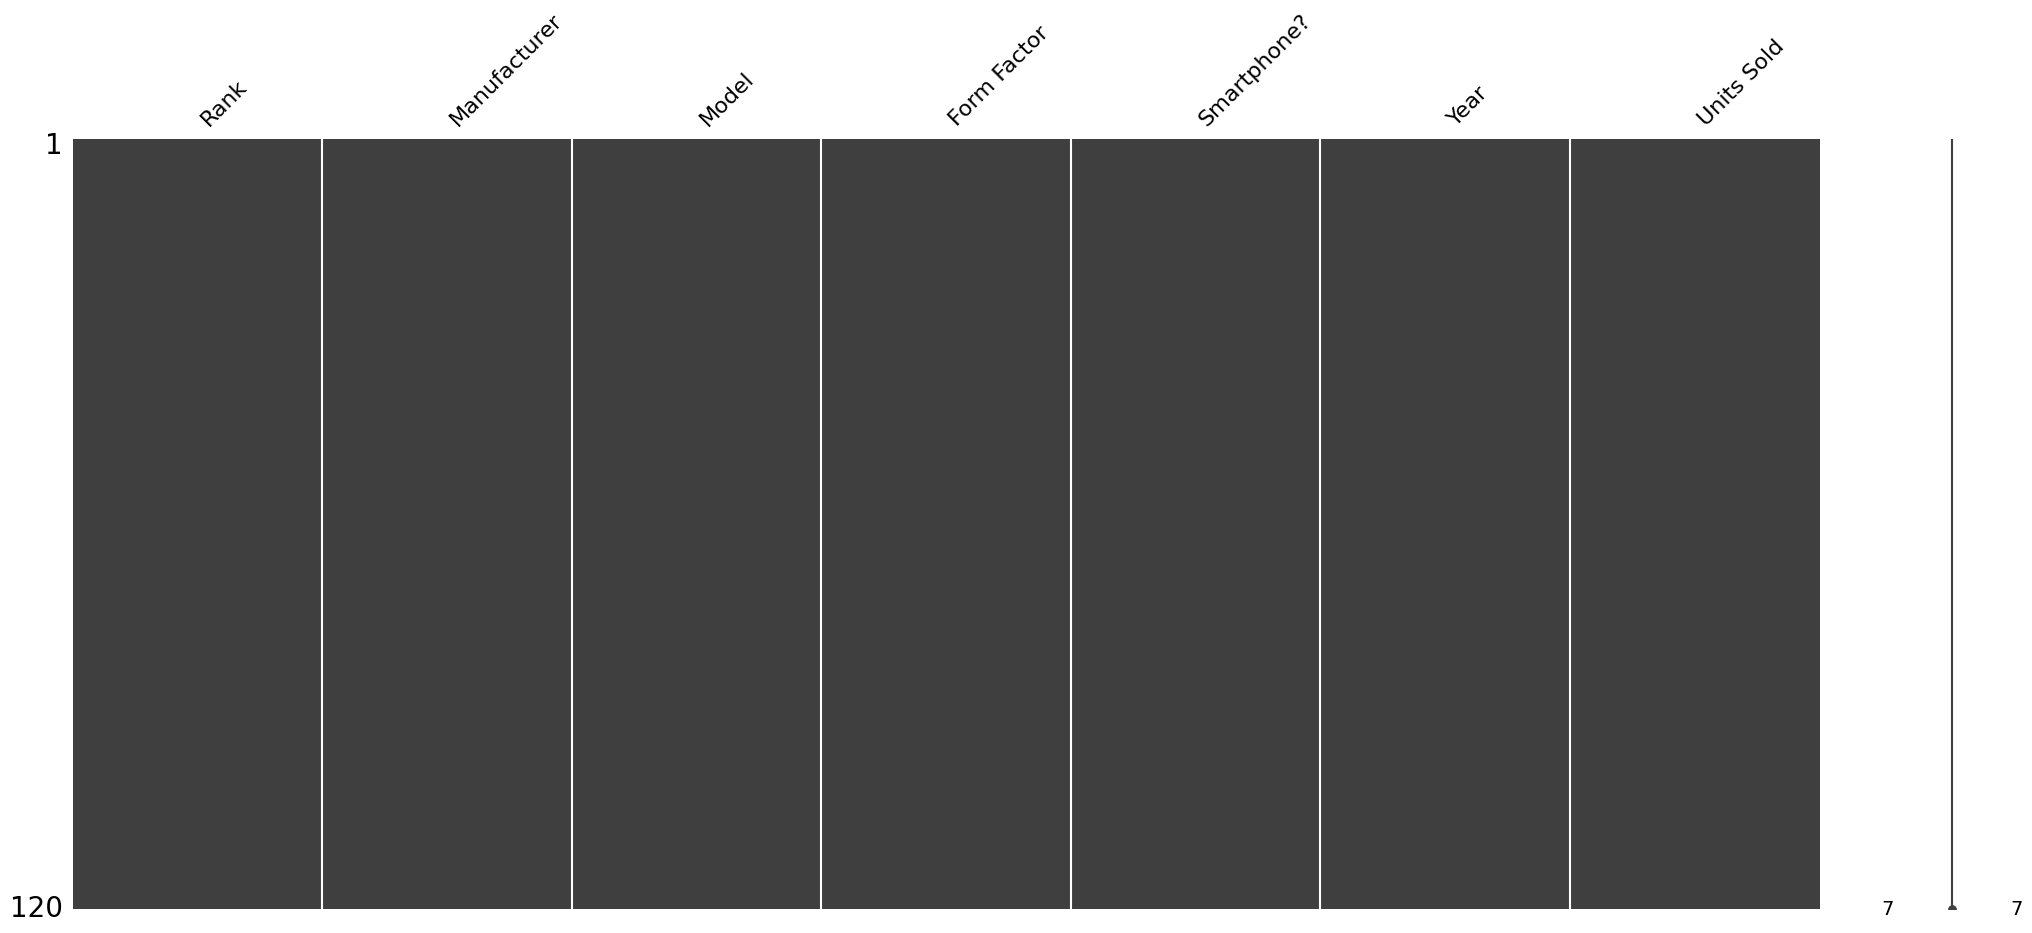

In [10]:
msno.matrix(df)

# Question we Analysis

### 1. **Descriptive Questions**
   - **What are the top 5 models in terms of units sold?**
   - **Which manufacturers dominate the mobile market in terms of total units sold?**
   - **What are the most common form factors (e.g., bar, flip) over the years?**

### 2. **Comparative Questions**
   - **How do smartphones compare to non-smartphones in terms of units sold?**
   - **Which manufacturer has the highest average units sold per model?**
   - **How do form factors differ across manufacturers in terms of popularity?**

### 3. **Trend Analysis**
   - **How has the number of units sold changed over time?**
   - **What is the trend in smartphone adoption over the years?**
   - **Which manufacturer has shown the most growth in units sold over the years?**

### 4. **Correlations and Relationships**
   - **Is there a correlation between the year of release and the number of units sold?**
   - **Do certain form factors correlate with higher sales?**
   - **Is there a relationship between the rank and the number of units sold?**

### 5. **Segmentation and Filtering**
   - **How do sales figures differ for models released before and after the introduction of smartphones?**
   - **Which models sold the most in specific years (e.g., 2000-2023)**

# EDA

### 1. **Descriptive Questions**

#### **What are the top 5 models in terms of units sold?**


In [11]:
df.groupby(['Model', 'Manufacturer'], as_index=False)['Units Sold'].sum() \
    .sort_values(by='Units Sold', ascending=False).head().reset_index(drop=True)

,Model,Manufacturer,Units Sold
0,1100,Nokia,250.0
1,1110,Nokia,247.5
2,iPhone 6 & 6 Plus,Apple,222.4
3,105 Series,Nokia,200.0
4,iPhone 6S & 6S Plus,Apple,174.1


#### **Which manufacturers dominate the mobile market in terms of total units sold?**

In [12]:
df1 = df.groupby(['Manufacturer'], as_index=False)['Units Sold'].sum() \
    .sort_values(by='Units Sold', ascending=False).reset_index(drop=True)
df1

,Manufacturer,Units Sold
0,Nokia,2374.5
1,Apple,1669.3
2,Samsung,994.5
3,Motorola,323.0
4,Huawei,113.8
5,Xiaomi,99.1
6,LG,92.0
7,Sony Ericsson,45.0
8,Oppo,16.7
9,HTC,16.0


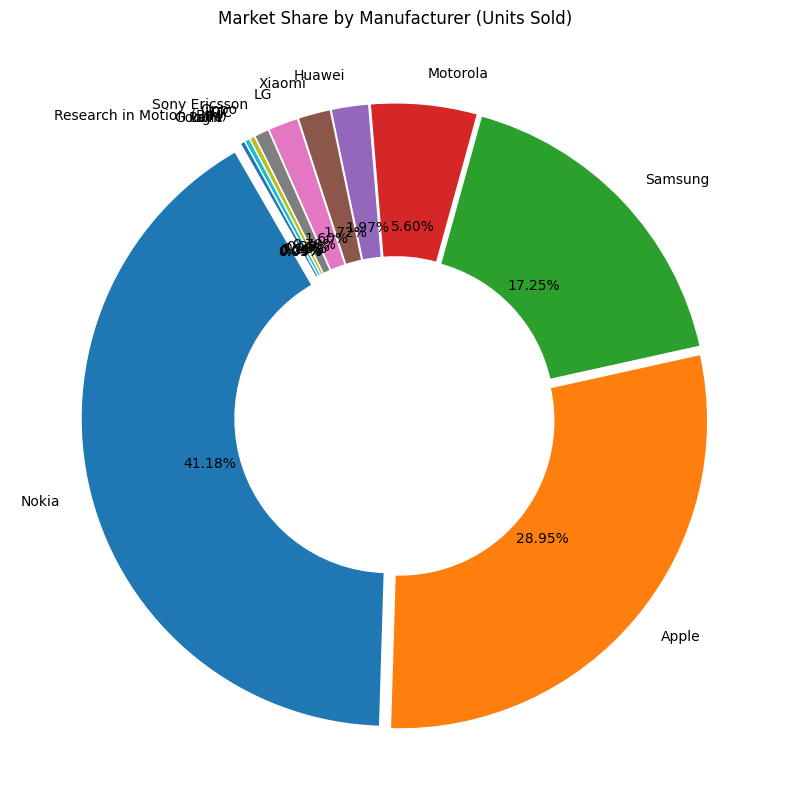

In [13]:
plt.figure(figsize=(14, 10))
explode = [0.02]*len(df1)

plt.pie(
    df1['Units Sold'],
    labels=df1['Manufacturer'],
    autopct='%1.2f%%',
    startangle=120,
    wedgeprops={'width': 0.5, 'edgecolor':'White', 'linewidth':1},
    explode=explode,
)
plt.title("Market Share by Manufacturer (Units Sold)")
plt.show()

#### **What are the most common form factors over the years?**

In [14]:
df.columns

Index(['Rank', 'Manufacturer', 'Model', 'Form Factor', 'Smartphone?', 'Year',
       'Units Sold'],
      dtype='object')

<Figure size 1200x800 with 0 Axes>

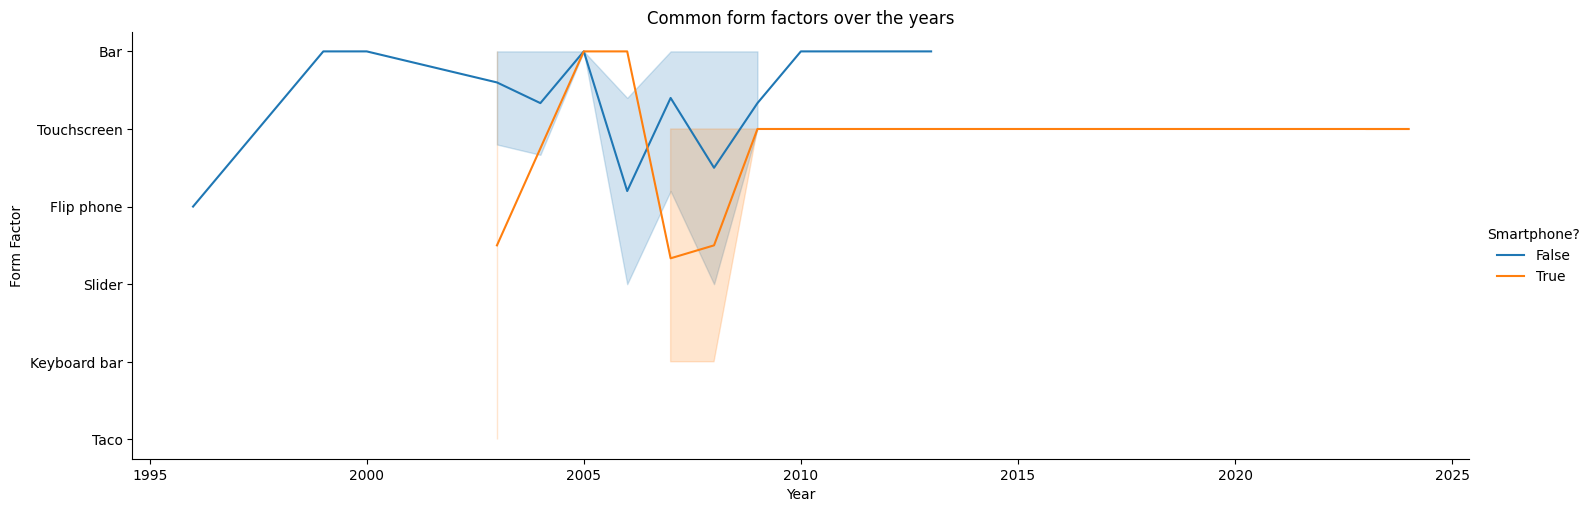

In [15]:
plt.figure(figsize=(12, 8))

sns.relplot(
    data=df,
    kind='line',
    x='Year',
    y='Form Factor',
    hue='Smartphone?',
    aspect=3,
    height=5,
    
)
plt.title('Common form factors over the years', size=12, y=1)
plt.show()

### 2. **Comparative Questions**

#### **How do smartphones compare to non-smartphones in terms of units sold?**


In [16]:
smartphone_sold = df[df['Smartphone?']== True]['Units Sold'].count()
non_smartphone_sold = df[df['Smartphone?']== False]['Units Sold'].count()

print(f"Total units sold by smartphones: {smartphone_sold} million")
print(f"Total units sold by non-smartphones: {non_smartphone_sold} million")

Total units sold by smartphones: 85 million
Total units sold by non-smartphones: 35 million


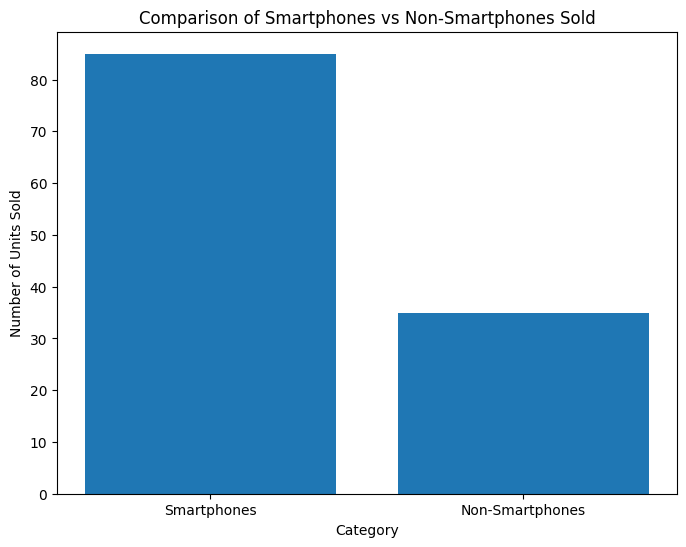

In [17]:
values = [smartphone_sold, non_smartphone_sold]
labels = ['Smartphones', 'Non-Smartphones']


plt.figure(figsize=(8, 6))
plt.bar(labels, values )

plt.title('Comparison of Smartphones vs Non-Smartphones Sold')
plt.ylabel('Number of Units Sold')
plt.xlabel('Category')
plt.show()

#### **Which manufacturer has the highest average units sold per model?**


In [18]:
df22 = df.groupby(['Manufacturer'], as_index=True)['Units Sold'].mean().sort_values(ascending=True)
df22 = pd.DataFrame(df22)
df22

,Units Sold
Manufacturer,
Palm,2.000000
Google,2.100000
LeTV,3.000000
Oppo,8.350000
LG,13.142857
Xiaomi,14.157143
Research in Motion (RIM),15.000000
Sony Ericsson,15.000000
HTC,16.000000


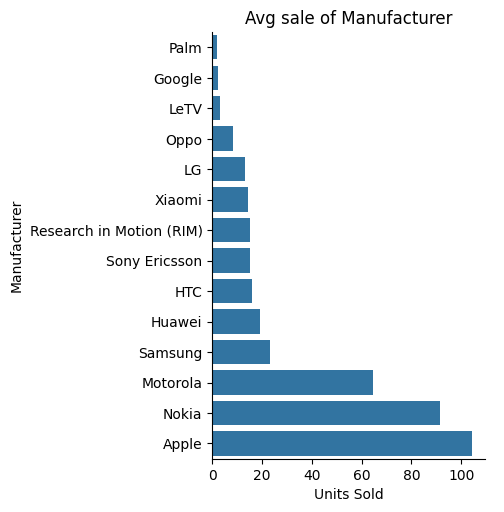

In [19]:
sns.catplot(
    data=df22,
    kind='bar',
    x='Units Sold',
    y='Manufacturer',
)
plt.title('Avg sale of Manufacturer')
plt.show()

#### **How do form factors differ across manufacturers in terms of popularity?**


In [20]:
df2 = df.groupby(['Manufacturer', 'Form Factor'], as_index=False)['Units Sold'].mean()
df2 = df2.sort_values(by='Units Sold', ascending=True)
df2 = df2.reset_index(drop=True)
df2

,Manufacturer,Form Factor,Units Sold
0,Palm,Keyboard bar,2.000000
1,Google,Touchscreen,2.100000
2,Nokia,Taco,3.000000
3,LeTV,Touchscreen,3.000000
4,Oppo,Touchscreen,8.350000
5,LG,Touchscreen,8.666667
6,Samsung,Flip phone,10.000000
7,Motorola,Touchscreen,13.000000
8,Xiaomi,Touchscreen,14.157143
9,Sony Ericsson,Bar,15.000000


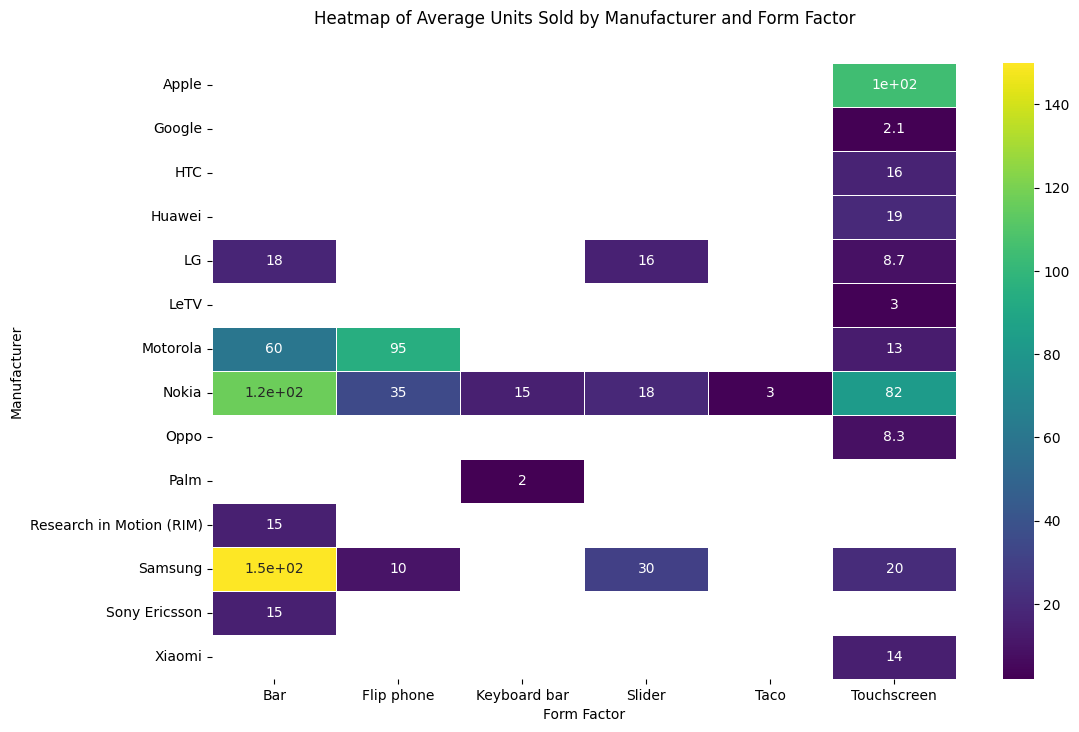

In [21]:
df23 = df.groupby(['Manufacturer', 'Form Factor'], as_index=False)['Units Sold'].mean()

pivot_df = df23.pivot(index='Manufacturer', columns='Form Factor', values='Units Sold')

plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_df,
    annot=True,
    cmap='viridis',
    linewidths=.5
)

plt.title("Heatmap of Average Units Sold by Manufacturer and Form Factor", y=1.05, size=12)
plt.xlabel("Form Factor")
plt.ylabel("Manufacturer")
plt.show()



### 3. **Trend Analysis**


#### **How has the number of units sold changed over time?**


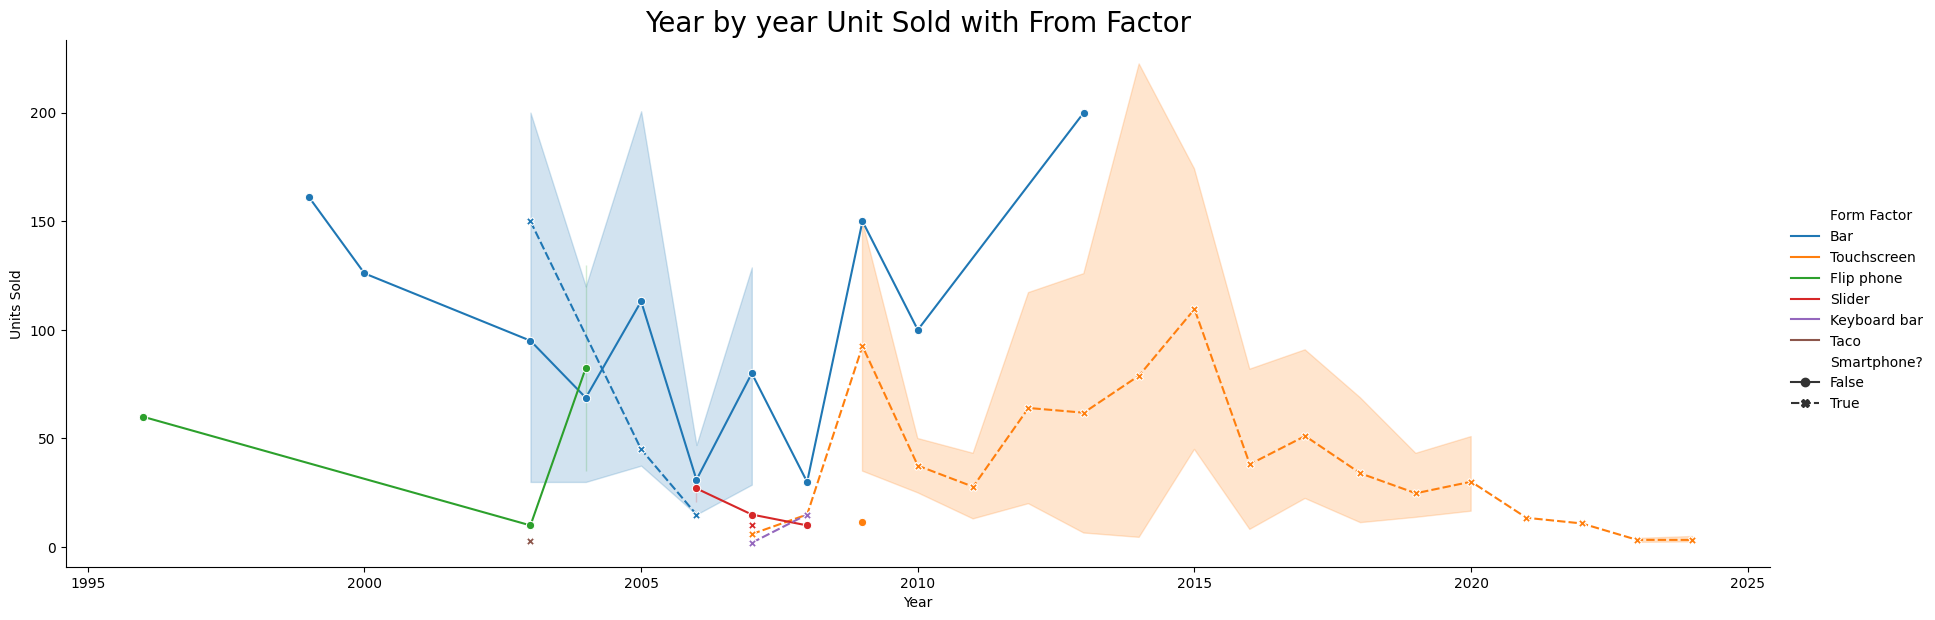

In [22]:
sns.relplot(
    data=df,
    kind='line',
    x='Year',
    y='Units Sold',
    style='Smartphone?',
    hue='Form Factor',
    height=6,
    aspect=3,
    markers=True
    
)

plt.title('Year by year Unit Sold with From Factor', size=20)
plt.show()

#### **Which manufacturer has shown the most growth in units sold over the years?**


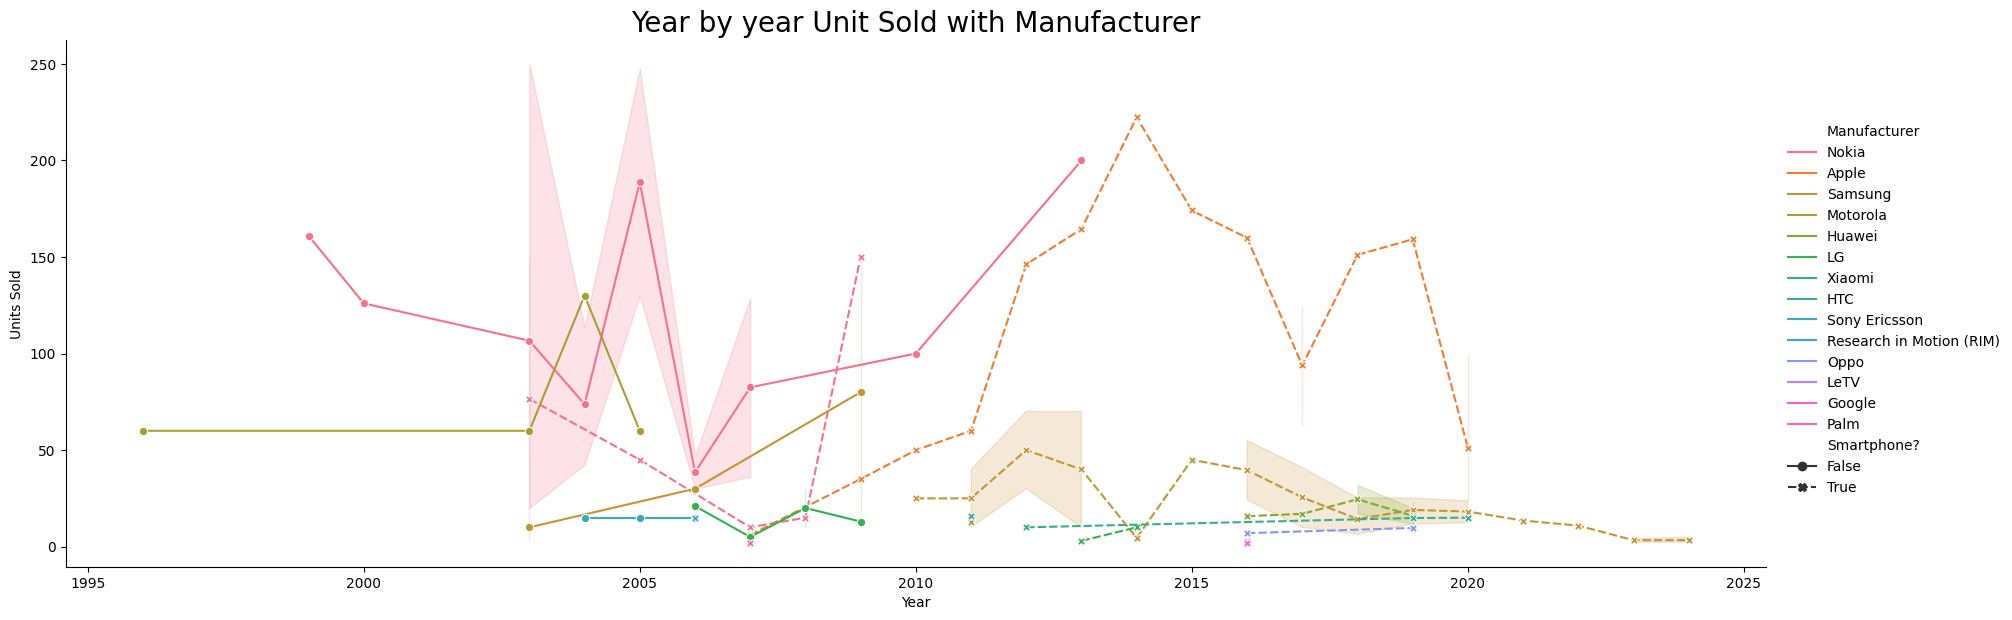

In [23]:
sns.relplot(
    data=df,
    kind='line',
    x='Year',
    y='Units Sold',
    style='Smartphone?',
    hue='Manufacturer',
    height=6,
    aspect=3,
    markers=True
    
)

plt.title('Year by year Unit Sold with Manufacturer', size=20)
plt.show()


### 4. **Correlations and Relationships**


   #### **Is there a correlation between the year of release and the number of units sold?**

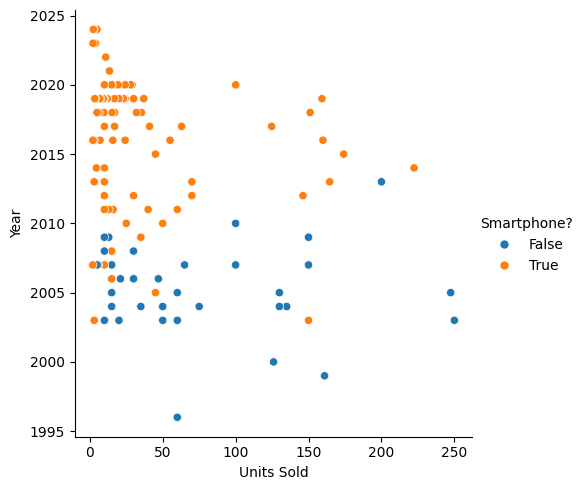

In [24]:
sns.relplot(
    data=df,
    y='Year',
    x='Units Sold',
    hue='Smartphone?',
     
)

plt.show()

   #### **Do certain form factors correlate with higher sales?**


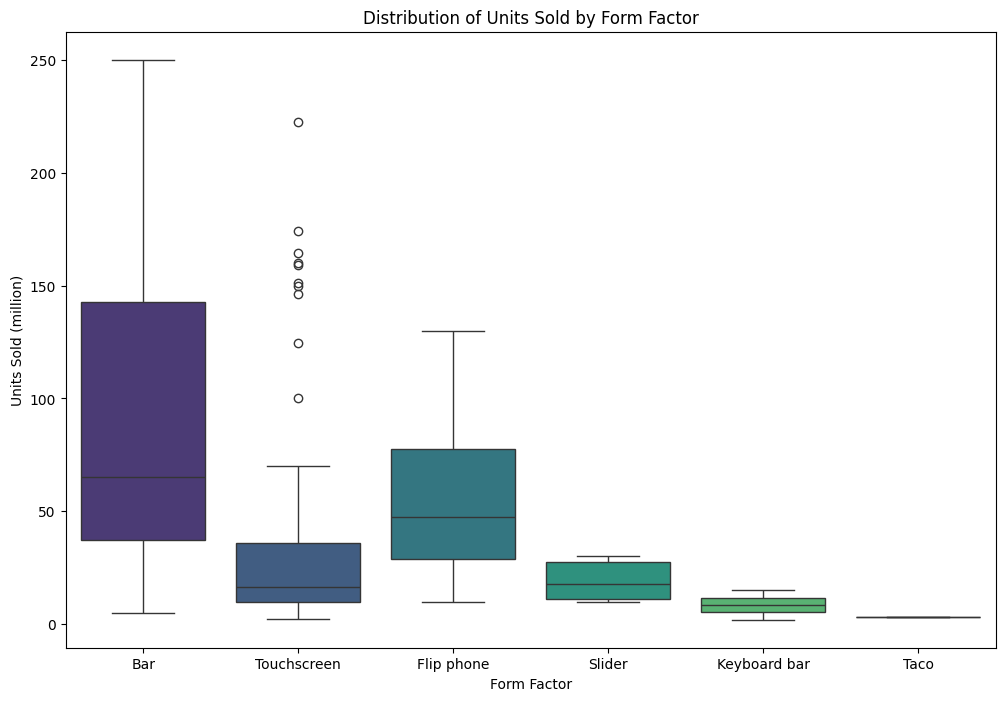

In [25]:
plt.figure(figsize=(12, 8))

sns.boxplot(
    data=df,
    x='Form Factor',
    y='Units Sold',
    palette='viridis'
)

plt.title("Distribution of Units Sold by Form Factor")
plt.xlabel("Form Factor")
plt.ylabel("Units Sold (million)")

plt.show()


### 5. **Segmentation and Filtering**

   #### **How do sales figures differ for models released before and after the introduction of smartphones?**

In [26]:
df['Model'].count()

120

In [27]:
df.groupby(['Manufacturer', 'Model'], as_index=True)['Units Sold'].sum().head().sort_values( ascending=False)

Manufacturer  Model                                  
Apple         iPhone 12, 12 mini ,12 Pro & 12 Pro Max    100.0
              iPhone 4                                    50.0
              iPhone 3GS                                  35.0
              iPhone 12 Pro Max                           29.0
              iPhone                                       6.0
Name: Units Sold, dtype: float64

   #### **Which models sold the most in specific years (e.g., 2000-2023)**